In [181]:
# Importing necessary libraries
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for mathematical operations

import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for advanced data visualization

from sklearn.cluster import KMeans  # for clustering analysis
from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import MinMaxScaler  # for data normalization

from sklearn.metrics import silhouette_score

In [157]:
# Reading a CSV file and creating a Pandas DataFrame object
df = pd.read_csv('dataset.csv')
df

,param_132,type,is_measured,normal_values,% of normal values,param dist.
0,464,AC,0,0.77,4,160
1,670,AC/DC,0,0.03,98,26
2,903,AC/DC,0,0.73,6,510
3,857,AC,0,0.40,47,802
4,7725,AC,1,0.58,31,729
...,...,...,...,...,...,...
23006,689,AC/DC,0,0.25,3,699
23007,578,AC/DC,0,0.40,66,488
23008,700,AC/DC,0,0.91,82,113
23009,33,AC/DC,0,0.05,88,366


In [158]:
# Mapping categorical data to numerical values
df.type = df.type.map({'AC' : 0, 'AC/DC' : 1})

# Generating descriptive statistics for the DataFrame
df.describe()

,param_132,type,is_measured,normal_values,% of normal values,param dist.
count,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000
mean,4448.269263,0.588458,0.411238,0.498768,50.045326,501.301378
std,5984.922921,0.492124,0.492069,0.290600,28.995487,290.043697
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,409.000000,0.000000,0.000000,0.250000,25.000000,249.000000
50%,825.000000,1.000000,0.000000,0.500000,50.000000,506.000000
75%,8006.500000,1.000000,1.000000,0.750000,75.000000,752.000000
max,23422.000000,1.000000,1.000000,1.000000,100.000000,1000.000000


In [159]:
# Display a summary of the DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   param_132           23011 non-null  int64  
 1   type                23011 non-null  int64  
 2   is_measured         23011 non-null  int64  
 3   normal_values       23011 non-null  float64
 4   % of normal values  23011 non-null  int64  
 5   param dist.         23011 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 MB


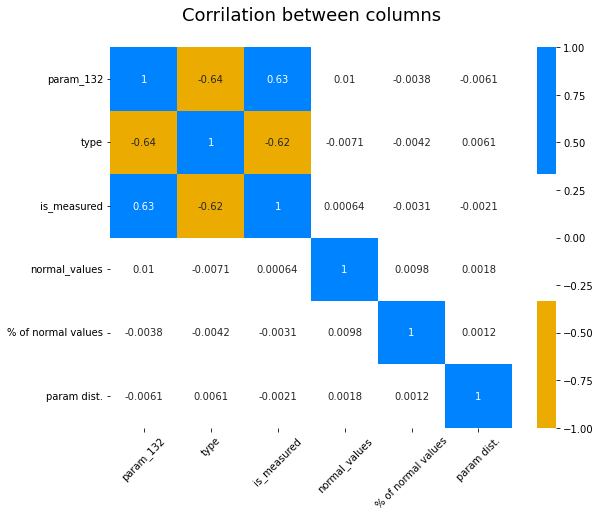

In [160]:
plt.figure(figsize=(9,7))
colors = ["#ecab00", '#ffffff', "#0083ff"]
cmap = sns.color_palette(colors)
sns.heatmap(df.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1)
plt.title('Corrilation between columns\n', fontdict={'fontsize' : 18})
plt.xticks(rotation = 45)
plt.show()

#### Here is we can see that only three columns has strong correlation and we can continue with this columns

In [161]:
# Select a subset of columns from the original DataFrame
df_most_corr = df[['param_132', 'type', 'is_measured']]
df_most_corr

,param_132,type,is_measured
0,464,0,0
1,670,1,0
2,903,1,0
3,857,0,0
4,7725,0,1
...,...,...,...
23006,689,1,0
23007,578,1,0
23008,700,1,0
23009,33,1,0


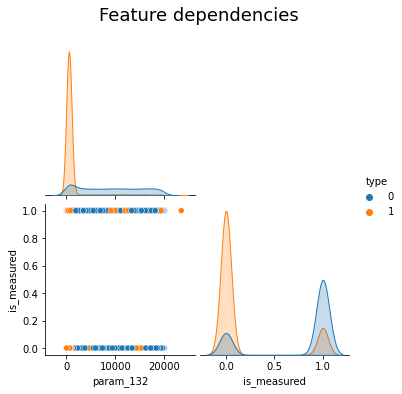

In [162]:
sns.pairplot(
    data = df_most_corr,
    hue= 'type',
    corner = True
    ).fig.suptitle(
    'Feature dependencies',
    y = 1.08,
    fontsize=18);

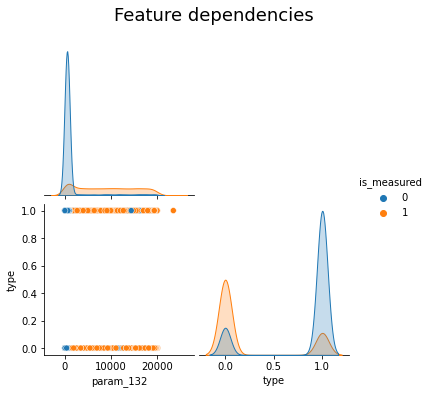

In [163]:
sns.pairplot(
    data = df_most_corr,
    hue= 'is_measured',
    corner = True
    ).fig.suptitle(
    'Feature dependencies',
    y = 1.08,
    fontsize=18
);

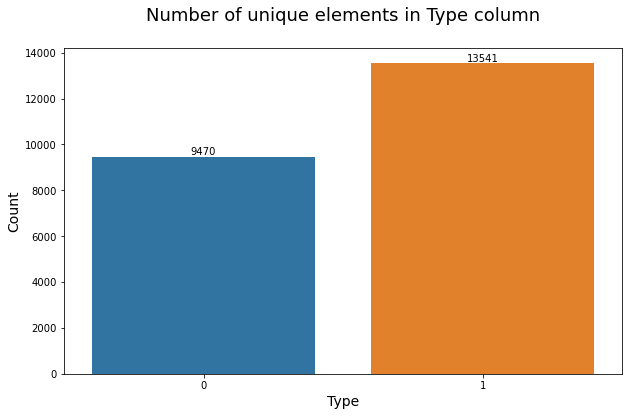

In [164]:
plt.figure(figsize=(10,6))

ax = sns.countplot(data = df_most_corr, x = 'type')
for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Number of unique elements in Type column\n', fontdict={'fontsize' : 18})
plt.xlabel('Type', fontdict={'fontsize' : 14})
plt.ylabel('Count', fontdict={'fontsize' : 14})

plt.show()

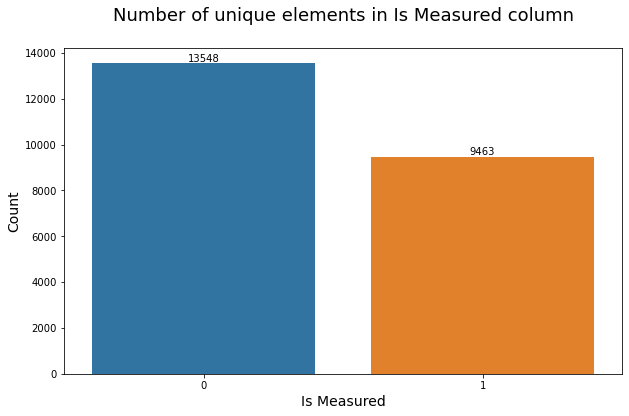

In [165]:
plt.figure(figsize=(10,6))

ax = sns.countplot(data = df_most_corr, x = 'is_measured')
for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Number of unique elements in Is Measured column\n', fontdict={'fontsize' : 18})
plt.xlabel('Is Measured', fontdict={'fontsize' : 14})
plt.ylabel('Count', fontdict={'fontsize' : 14})

plt.show()

In [166]:
# Here is showed number and some statistical information of is_measured column for each category of type column 
for i in range(2):
    for j in range(2):
        df_accross = df_most_corr[(df_most_corr.type == i) & (df_most_corr.is_measured == j)]
        print(f'For type - {i} and is_measured - {j} values: {df_accross.shape}\n')
        print(df_accross.describe())
        print('------------------------------------------------------\n')

For type - 0 and is_measured - 0 values: (2148, 3)

          param_132    type  is_measured
count   2148.000000  2148.0       2148.0
mean    4945.746276     0.0          0.0
std     6310.497564     0.0          0.0
min        1.000000     0.0          0.0
25%      426.750000     0.0          0.0
50%      862.500000     0.0          0.0
75%     9435.250000     0.0          0.0
max    19986.000000     0.0          0.0
------------------------------------------------------

For type - 0 and is_measured - 1 values: (7322, 3)

          param_132    type  is_measured
count   7322.000000  7322.0       7322.0
mean   10251.505736     0.0          1.0
std     5599.164483     0.0          0.0
min        2.000000     0.0          1.0
25%     5407.000000     0.0          1.0
50%    10260.000000     0.0          1.0
75%    15168.500000     0.0          1.0
max    19996.000000     0.0          1.0
------------------------------------------------------

For type - 1 and is_measured - 0 values: (1140

In [167]:
# Scale the values in the DataFrame using Min-Max scaling
scaled_df = MinMaxScaler().fit_transform(df_most_corr)
scaled_df

array([[0.01976858, 0.        , 0.        ],
       [0.02856411, 1.        , 0.        ],
       [0.03851245, 1.        , 0.        ],
       ...,
       [0.02984501, 1.        , 0.        ],
       [0.0013663 , 1.        , 0.        ],
       [0.56735408, 0.        , 1.        ]])

In [168]:
# Define a grid of hyperparameters to search over for K-Means clustering
param_grid = {'n_clusters': np.arange(2, 11),
              'init': ['k-means++', 'random'],
              'n_init': [10, 20, 30],
              'max_iter': [100, 200, 300],
              'tol': [1e-4, 1e-5, 1e-6],
              'algorithm': ['auto', 'full', 'elkan']}

In [147]:
# Perform a grid search over hyperparameters for K-Means clustering
kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5)
grid_search.fit(scaled_df)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300],
                         'n_clusters': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_init': [10, 20, 30],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [169]:
# Print the best hyperparameters found by the grid search
print("Best parameters:", grid_search.best_params_)

Best parameters: {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10, 'n_init': 10, 'tol': 0.0001}


In [170]:
# Train a K-Means clustering model with the best hyperparameters found
best_kmeans = KMeans(**grid_search.best_params_)
best_kmeans.fit(scaled_df)

KMeans(algorithm='elkan', n_clusters=10)

In [171]:
# Use the trained K-Means model to predict cluster labels for the scaled data
target = best_kmeans.predict(scaled_df)

In [172]:
# Add the predicted cluster labels as a new column to the original DataFrame
df_most_corr['target'] = target

C:\Users\qiziq\AppData\Local\Temp\ipykernel_8044\761572381.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
# Calculate the correlation between each feature and the predicted cluster labels
df_most_corr.corrwith(df_most_corr.target)

param_132      0.498335
type          -0.659926
is_measured    0.512463
target         1.000000
dtype: float64

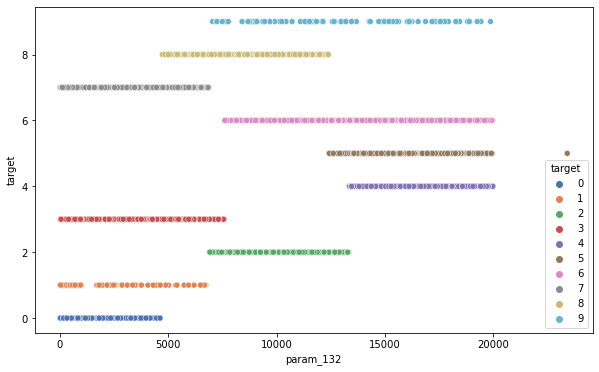

In [177]:
# Create a scatter plot of 'param_132' against the predicted cluster labels
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_most_corr, x='param_132', y='target', hue='target', palette="deep")
plt.show()

### To be honest, it is a bit difficult to determine the number of labels, because it is impossible to achieve a booking result without understanding the essence of the business. True, this is not a real case, it's just generated data. I think there could be some unusual decision here, but I couldn't figure it out. However, I tried to find a solution. I will wait for your feedback. Thanks!